In [6]:
from qiskit import *

In [7]:
q = QuantumRegister(8)
c = ClassicalRegister(8)
#initialize registers
Uf1 = QuantumCircuit(q,c)
#create circuit 


Uf1.barrier()
Uf1.h(q)
Uf1.barrier()
#apply h to all qubits 



Uf1.measure(q, c)



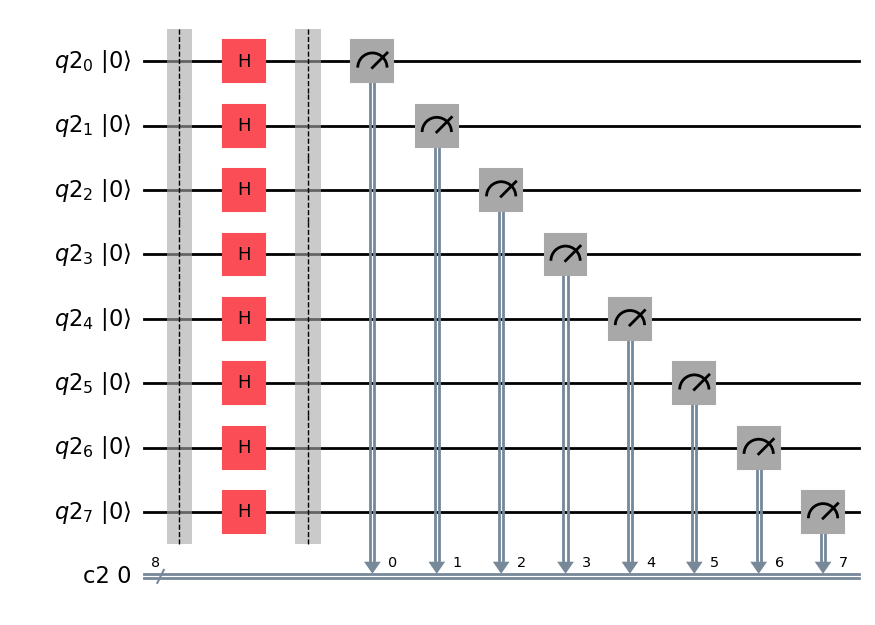

In [8]:
Uf1.draw("mpl",style="iqp", initial_state=True)

### Executing the circuit on the local qasm simulator

In [68]:
from qiskit_aer import Aer
import random
from collections import Counter
import math

simulator = Aer.get_backend('qasm_simulator')

In [69]:
# We've set the number of shots (repeats) of the circuit
# to be 1024, which is the default value
job_sim = simulator.run(Uf1,shots=10)

In [70]:
# Grab the results from the job
result_sim = job_sim.result()

In [71]:


counts_sim = result_sim.get_counts(Uf1)
print(counts_sim)

def binary_to_decimal(binary_str):
    return int(binary_str, 2)

def binary_list_to_decimal_integers(binary_list):
    decimal_integers = []
    for binary_str in binary_list:
        decimal_integers.append(binary_to_decimal(binary_str))
    return decimal_integers

# Example binary strings
#binary_strings = ['1101', '1010', '1111']
binary_strings = (counts_sim)

# Convert binary strings to decimal integers
decimal_integers = binary_list_to_decimal_integers(binary_strings)

#####################################################################################
def calculate_statistics(numbers):
    # Sort the list of numbers
    sorted_numbers = sorted(numbers)
    
    # Calculate the smallest element
    smallest = sorted_numbers[0]
    
    # Calculate the largest element
    largest = sorted_numbers[-1]
    
    # Calculate the median
    n = len(sorted_numbers)
    if n % 2 == 0:
        median = (sorted_numbers[n // 2 - 1] + sorted_numbers[n // 2]) / 2
    else:
        median = sorted_numbers[n // 2]
    
    # Calculate the average
    average = sum(sorted_numbers) / n
    
    return smallest, largest, median, average
########################################################################
def calculate_entropy(int_list):
    # Count the occurrences of each integer in the list
    counts = Counter(int_list)
    # Calculate the total number of integers in the list
    total_count = len(int_list)
    
    # Calculate the probability of each integer
    probabilities = [count / total_count for count in counts.values()]
    
    # Calculate the entropy
    entropy = -sum(probability * math.log2(probability) for probability in probabilities)
    
    return entropy
################################################################################
#print("Binary Strings:", binary_strings)
smallest, largest, median, average = calculate_statistics(decimal_integers)
print("Decimal Integers:", decimal_integers)
print("Smallest:", smallest)
print("Largest:", largest)
print("Median:", median)
print("Average:", average)
print("Entropy:", calculate_entropy(decimal_integers))





{'00010110': 1, '10011010': 1, '11001001': 1, '11110010': 1, '11001010': 1, '11011001': 1, '10010001': 1, '10101111': 1, '11010101': 1, '10001110': 1}
Decimal Integers: [22, 154, 201, 242, 202, 217, 145, 175, 213, 142]
Smallest: 22
Largest: 242
Median: 188.0
Average: 171.3
Entropy: 3.321928094887362


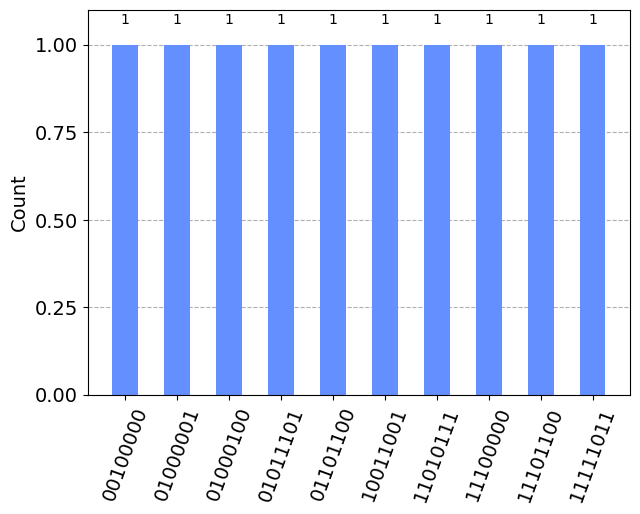

In [13]:
# Plot a histogram of the results
from qiskit.visualization import plot_histogram
plot_histogram(counts_sim)

In [26]:
from qiskit_ibm_provider import IBMProvider, least_busy

In [27]:
# Loads your personal account number, which you have previously saved
provider = IBMProvider()

In [28]:
# Available IBM devices that are NOT a simulator
provider.backends(simulator=False, operational=True)

[<IBMBackend('ibm_brisbane')>,
 <IBMBackend('ibm_kyoto')>,
 <IBMBackend('ibm_osaka')>,
 <IBMBackend('ibm_sherbrooke')>]

In [29]:
backend = least_busy(provider.backends(simulator=False, operational=True))

In [30]:
backend.name

'ibm_kyoto'

In [31]:
mapped_Uf1=transpile(Uf1,backend=backend)

In [32]:
# default number of shots is 4000
job_exp = backend.run(Uf1, shots=20)

In [33]:
jobid = job_exp.job_id()
jobid

'crmqfan82psg008j0gs0'

In [72]:
job_exp.status()

<JobStatus.QUEUED: 'job is queued'>

In [73]:
job_exp.queue_position()

In [ ]:
retrieved_job = provider.backend.retrieve_job('crmqfan82psg008j0gs0')

In [ ]:
result_exp = retrieved_job.result()

In [ ]:
counts_exp = result_exp.get_counts()
print(counts_exp)


def binary_to_decimal(binary_str):
    return int(binary_str, 2)

def binary_list_to_decimal_integers(binary_list):
    decimal_integers = []
    for binary_str in binary_list:
        decimal_integers.append(binary_to_decimal(binary_str))
    return decimal_integers


binary_strings = (counts_exp)

# Convert binary strings to decimal integers
decimal_integers = binary_list_to_decimal_integers(binary_strings)

#####################################################################################
def calculate_statistics(numbers):
    # Sort the list of numbers
    sorted_numbers = sorted(numbers)
    
    # Calculate the smallest element
    smallest = sorted_numbers[0]
    
    # Calculate the largest element
    largest = sorted_numbers[-1]
    
    # Calculate the median
    n = len(sorted_numbers)
    if n % 2 == 0:
        median = (sorted_numbers[n // 2 - 1] + sorted_numbers[n // 2]) / 2
    else:
        median = sorted_numbers[n // 2]
    
    # Calculate the average
    average = sum(sorted_numbers) / n
    
    return smallest, largest, median, average
########################################################################
def calculate_entropy(int_list):
    # Count the occurrences of each integer in the list
    counts = Counter(int_list)
    # Calculate the total number of integers in the list
    total_count = len(int_list)
    
    # Calculate the probability of each integer
    probabilities = [count / total_count for count in counts.values()]
    
    # Calculate the entropy
    entropy = -sum(probability * math.log2(probability) for probability in probabilities)
    
    return entropy
################################################################################
#print("Binary Strings:", binary_strings)
smallest, largest, median, average = calculate_statistics(decimal_integers)
print("Decimal Integers:", decimal_integers)
print("Smallest:", smallest)
print("Largest:", largest)
print("Median:", median)
print("Average:", average)
print("Entropy:", calculate_entropy(decimal_integers))





In [ ]:
from qiskit.visualization import plot_histogram
plot_histogram([counts_sim,counts_exp], legend=['Device', 'Simulator'])